# Assignment 3 
Done by: Group 3

| Name | Matric No. |
| --- | --- |
| Aaron Yuen Sze Tian | A0188252Y |
| Lo Hei Ting | A0188435U |
| Loh Yee Shing, Bryan | A0188158N |
| Ammar Bin Hussein Bagharib | A0218111X |

In [1]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
import matplotlib.pyplot as plt 
from sklearn.covariance import EmpiricalCovariance

In [2]:
data = {
    'Regulation': ['Strict', 'Moderate', 'Mild'],
    'Probability': [0.1, 0.5, 0.4],
    'Price of X': [70, 105, 120],
    'Price of Y': [140, 125, 115]
}
#creating df of probabilities
q1_df = pd.DataFrame(data)
q1_df

,Regulation,Probability,Price of X,Price of Y
0,Strict,0.1,70,140
1,Moderate,0.5,105,125
2,Mild,0.4,120,115


## Qn 1a

In [3]:
#initial price of $100 for X and $120 for Y. Thus we calculate returns based on these prices.

q1_df['X returns'] = (q1_df['Price of X'] - 100) / 100 
q1_df['Y returns'] = (q1_df['Price of Y'] - 120) / 120
q1_df

,Regulation,Probability,Price of X,Price of Y,X returns,Y returns
0,Strict,0.1,70,140,-0.30,0.166667
1,Moderate,0.5,105,125,0.05,0.041667
2,Mild,0.4,120,115,0.20,-0.041667


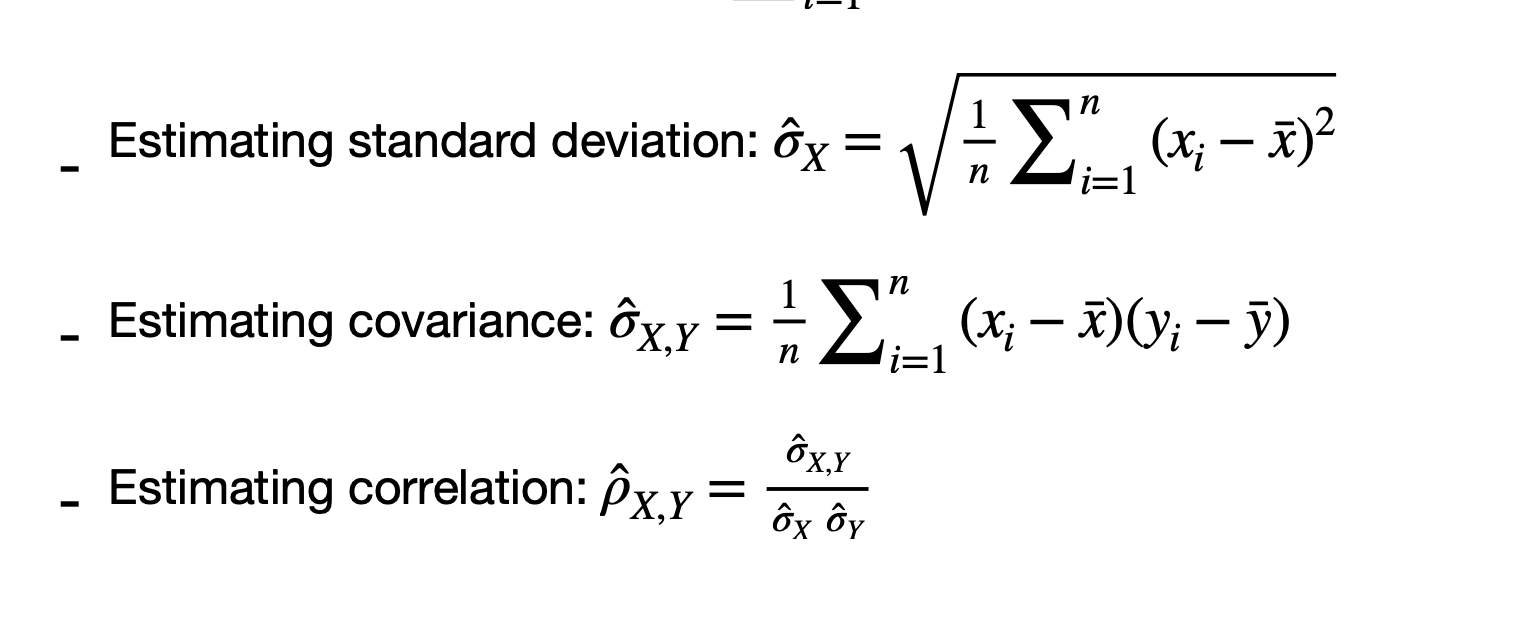

In [4]:
er_x = sum(q1_df['Probability'] * q1_df['X returns']) #expected returns of X
er_y = sum(q1_df['Probability'] * q1_df['Y returns']) #expected returns of Y

std_x = np.sqrt( sum( [p * np.square(x_return - er_x) for p, x_return in zip(q1_df['Probability'], q1_df['X returns']) ] ) ) #standard deviation of x
std_y = np.sqrt( sum( [p * np.square(y_return - er_y) for p, y_return in zip(q1_df['Probability'], q1_df['Y returns']) ] ) ) #standard deviation of y

#covariance between returns of X and Y
cov_x_y = sum( q1_df['Probability'] * ((q1_df['X returns'] - er_x) * (q1_df['Y returns'] - er_y)) )

In [5]:
corr_x_y = cov_x_y / (std_x * std_y)
print('Correlation between returns of Stock X and Stock Y is:', corr_x_y)

Correlation between returns of Stock X and Stock Y is: -0.9864400504156213


## Qn 1b

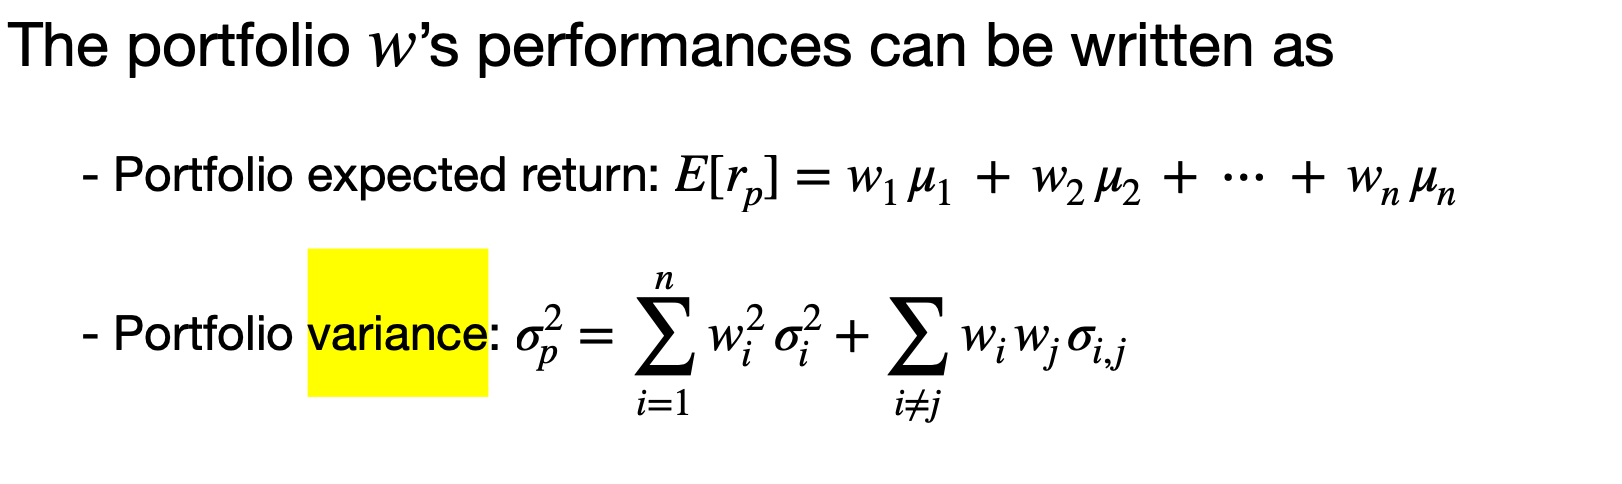

In [6]:
"""
to calculate expected return on X and Y, we need to calculate the weights on X and Y, 
multiply them by their expected returns. 

variance of portfolio would be:
(weight_x * var_x)^2 + (weight_y * var_y)^2 + 2(weight_x * weight_y * cov_x_y)
"""

weight_x = (100*100)/(100*100 + 120*120)
weight_y = 1- weight_x

Portfolio_r = weight_x * er_x + weight_y * er_y
Portfolio_Var = (weight_x**2 * std_x**2) + (weight_y**2 * std_y**2)  + (2 * weight_x * weight_y * cov_x_y)


print('Expected Return in Stock X and Y is', Portfolio_r)
print('Standard Deviation of return in Stock X and Y is', Portfolio_Var**0.5)

Expected Return in Stock X and Y is 0.04303278688524591
Standard Deviation of return in Stock X and Y is 0.023274214531968325


#### Sharpe Ratio

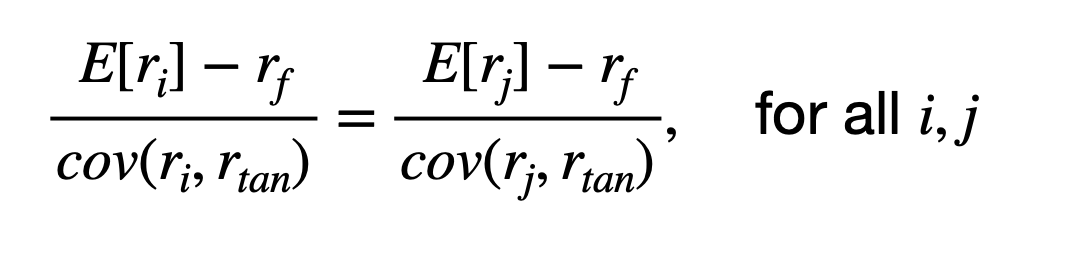


In [7]:
rf_rate = 0.5 / 100 #risk free rate 0.5%
Sharpe_ratio = (Portfolio_r - rf_rate)/(Portfolio_Var**0.5)

print('Sharpe ratio of portfolio is:', Sharpe_ratio)

Sharpe ratio of portfolio is: 1.6341168821403589


## Qn 2

Your brother comes to you for some investment advice on how to split his money between several portfolios managed by a mutual fund.

-  Portfolio A consists entirely of risk-free securities, and has a certain return of 4%. 
-  Portfolio B has an expected return of 19% and a standard deviation of 25%.
-  Portfolio C has an expected return of 10% and a standard deviation of 15%.

Your brother is leaning towards investing his money entirely in portfolio C, 
since he is unwilling to take the higher risk associated with portfolio B, 
but wants a higher return than offered by portfolio A.


(a) After taking the class, you suggest to him an alternative portfolio (consisting of a combina- tion of A and B) that has the same standard deviation as portfolio C but higher expected return. Assume he has $20,000 to invest.

i. How much should he invest in A and how much in B? 

ii. What is his expected return in this case?

In [8]:
er_a = 0.04 #expected return of a
std_a = 0 #risk free standard deviation

er_b = 0.19 #expected return of b
std_b = 0.25 #std of b

er_c = 0.1 #expected return of c
std_c = 0.15 #std of c

Portfolio_Var = (weight_a^2 * std_a^2) + (weight_b^2 * std_b^2)  + (2 * weight_b * weight_b * cov_a_b)
-  since std_a is 0, the covariance of returns between a and b would be 0
-  thus the portfolio variance would be:

(weight_b^2 * std_b^2) = variance of C returns

therefore, weight of b would be square root of the variance of C divided by variance of B

In [9]:
weight_b = np.sqrt(std_c**2 / std_b ** 2)
weight_a = 1 - weight_b

total_amt = 20000
amt_a = weight_a * total_amt
amt_b = weight_b * total_amt

print("Amount to be invested in a: ", amt_a, "\n",
     "Amount invested in b: ", amt_b)

Amount to be invested in a:  8000.0 
 Amount invested in b:  12000.0


In [10]:
Portfolio_return_ab = weight_a * er_a + weight_b * er_b
print('Expected Return of new portfolio in A and B is', Portfolio_return_ab)

Expected Return of new portfolio in A and B is 0.13


## 2b

Sketch a risk/return diagram to help explain to him why his combination of risk and return is improved by this option and why his risk has not increased. 

Show all four portfolios on the diagram (the original three plus your suggestion).

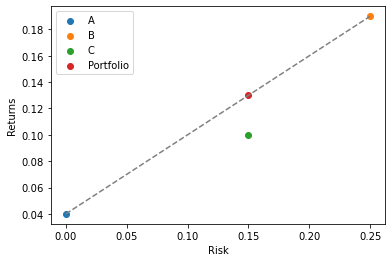

In [11]:
# plot portfolios points
fig, ax = plt.subplots()
for risk,ret,lab in zip(
    [std_a, std_b, std_c, std_c],
    [er_a, er_b, er_c, Portfolio_return_ab],
    ['A','B','C','Portfolio']):
    ax.scatter(risk,ret,label=lab)

# plot linear combination of asset A and B
ax.plot([std_a, std_b],
        [er_a, er_b],
        c='gray',
        ls='--')

ax.set_xlabel('Risk')
ax.set_ylabel('Returns')
ax.legend()

## Qn 3

The file q3 data.csv contains the monthly returns on:
-  A Salomon Brothers portfolio of non-US bonds (supplied by Ibbotson Associates).
-  The Morgan Stanley Capital International (MSCI) EAFE (Europe, Asia, and the Far East) index of world stock market performance.
-  The Value-Weighted portfolio of US Common Stocks.
-  A portfolio of 100 US Corporate Bonds, from Ibbotson Associates.
-  The Money Market rate.

All returns are measured in the unit of percentages. These data series all start in January of 1985 and run through the end of 1992.

In [12]:
q3_df = pd.read_csv('q3_data.csv')
q3_df.head()

,Month,SB Non-US Bonds,MSCI EAFE,CRSP VW US common stocks,US Corp Bonds,Money Market
0,Jan 1985,-0.87%,2.28%,8.58%,2.86%,0.61%
1,Feb 1985,-4.52%,-0.56%,1.70%,-2.57%,0.62%
2,Mar 1985,8.10%,7.79%,-0.19%,1.92%,0.62%
3,Apr 1985,0.67%,-0.31%,-0.22%,2.21%,0.65%
4,May 1985,2.82%,4.28%,5.59%,6.17%,0.59%


In [13]:
q3_df.tail()

,Month,SB Non-US Bonds,MSCI EAFE,CRSP VW US common stocks,US Corp Bonds,Money Market
91,Aug 1992,4.42%,6.31%,-2.07%,0.78%,0.25%
92,Sep 1992,0.64%,-1.94%,1.24%,1.20%,0.25%
93,Oct 1992,-3.61%,-5.22%,1.09%,-1.80%,0.22%
94,Nov 1992,-2.57%,0.97%,4.02%,0.16%,0.23%
95,Dec 1992,-0.21%,0.55%,1.75%,1.83%,0.22%


In [14]:
q3_df.dtypes

Month                       object
SB Non-US Bonds             object
MSCI EAFE                   object
CRSP VW US common stocks    object
US Corp Bonds               object
Money Market                object
dtype: object

In [15]:
for i in q3_df.columns[1:]:
    q3_df[i] = q3_df[i].astype('string') #convert to string
    q3_df[i] = q3_df[i].str.rstrip('%') #remove % sign
    q3_df[i] = q3_df[i].astype('float') / 100 #convert to numeric percentages
    
q3_df.head()

,Month,SB Non-US Bonds,MSCI EAFE,CRSP VW US common stocks,US Corp Bonds,Money Market
0,Jan 1985,-0.0087,0.0228,0.0858,0.0286,0.0061
1,Feb 1985,-0.0452,-0.0056,0.0170,-0.0257,0.0062
2,Mar 1985,0.0810,0.0779,-0.0019,0.0192,0.0062
3,Apr 1985,0.0067,-0.0031,-0.0022,0.0221,0.0065
4,May 1985,0.0282,0.0428,0.0559,0.0617,0.0059


#### (a) For the period 1/1/1985 through 12/31/1992, calculate:

i. The (in-sample) average **excess** return (i.e. the returns above the money market return) for each of the first four assets.


In [16]:
# excess return calculated by taking each return for every security - money market return
# ",".join(["girl", "boy"])

sb_non_us_bonds_excess_ave = np.mean(q3_df.iloc[:, 1] - q3_df['Money Market'])
msci_eafe_excess_ave = np.mean(q3_df.iloc[:, 2] - q3_df['Money Market'])
crsp_vw_us_excess_ave = np.mean(q3_df.iloc[:, 3] - q3_df['Money Market'])
us_corp_excess_ave = np.mean(q3_df.iloc[:, 4] - q3_df['Money Market'])

print(
    "Average excess returns of, "
    "\n",
    "SB Non-US Bonds: ", sb_non_us_bonds_excess_ave,
    "\n",
    "MSCI EAFE: ", msci_eafe_excess_ave,
    "\n",
    "CRSP VW US common stocks: ", crsp_vw_us_excess_ave,
    "\n",
    "US Corp Bonds: ", us_corp_excess_ave
)

Average excess returns of, 
 SB Non-US Bonds:  0.008383333333333335 
 MSCI EAFE:  0.010290625000000003 
 CRSP VW US common stocks:  0.008464583333333336 
 US Corp Bonds:  0.004875


#### ii. The (in-sample) standard deviation for each of these excess returns.

In [17]:
sb_non_us_bonds_excess_std = np.std(q3_df.iloc[:, 1] - q3_df['Money Market'])
msci_eafe_excess_std = np.std(q3_df.iloc[:, 2] - q3_df['Money Market'])
crsp_vw_us_excess_std = np.std(q3_df.iloc[:, 3] - q3_df['Money Market'])
us_corp_excess_std = np.std(q3_df.iloc[:, 4] - q3_df['Money Market'])

print(
    "Std excess returns of, "
    "\n",
    "SB Non-US Bonds: ", sb_non_us_bonds_excess_std,
    "\n",
    "MSCI EAFE: ", msci_eafe_excess_std,
    "\n",
    "CRSP VW US common stocks: ", crsp_vw_us_excess_std,
    "\n",
    "US Corp Bonds: ", us_corp_excess_std
)

Std excess returns of, 
 SB Non-US Bonds:  0.03649612041786846 
 MSCI EAFE:  0.05838752556219557 
 CRSP VW US common stocks:  0.04712125091003411 
 US Corp Bonds:  0.015557547739495019


#### iii. The (in-sample) covariance matrix (of the excess returns).

In [18]:
q3a_df = pd.DataFrame(
    {
        "SB Non-US Bonds": q3_df.iloc[:, 1] - q3_df['Money Market'],
        "MSCI EAFE": q3_df.iloc[:, 2] - q3_df['Money Market'],
        "CRSP VW US common stocks": q3_df.iloc[:, 3] - q3_df['Money Market'],
        "US Corp Bonds": q3_df.iloc[:, 4] - q3_df['Money Market']
    }
)

q3a_df

,SB Non-US Bonds,MSCI EAFE,CRSP VW US common stocks,US Corp Bonds
0,-0.0148,0.0167,0.0797,0.0225
1,-0.0514,-0.0118,0.0108,-0.0319
2,0.0748,0.0717,-0.0081,0.0130
3,0.0002,-0.0096,-0.0087,0.0156
4,0.0223,0.0369,0.0500,0.0558
...,...,...,...,...
91,0.0417,0.0606,-0.0232,0.0053
92,0.0039,-0.0219,0.0099,0.0095
93,-0.0383,-0.0544,0.0087,-0.0202
94,-0.0280,0.0074,0.0379,-0.0007


In [19]:
q3a_df.cov()

,SB Non-US Bonds,MSCI EAFE,CRSP VW US common stocks,US Corp Bonds
SB Non-US Bonds,0.001346,0.001230,-0.000179,0.000170
MSCI EAFE,0.001230,0.003445,0.001172,0.000177
CRSP VW US common stocks,-0.000179,0.001172,0.002244,0.000264
US Corp Bonds,0.000170,0.000177,0.000264,0.000245


In [20]:
np.cov(q3a_df, rowvar = False)

array([[ 0.00134599,  0.00122972, -0.00017891,  0.00017025],
       [ 0.00122972,  0.00344499,  0.00117179,  0.00017688],
       [-0.00017891,  0.00117179,  0.00224379,  0.00026379],
       [ 0.00017025,  0.00017688,  0.00026379,  0.00024459]])

In [21]:
q3a_df.shape

(96, 4)


### iii. Plot the ex-post (i.e., in-sample) efficient frontier for this set of assets. 

In the same plot, please also include 
1.  the global minimum variance portfolio    
2.  the tangency portfolio    
3.  Sharpe ratio maximizing portfolio with no-shorting constraint and 
4.  each of the four assets on the plot.

In [22]:
#expected return vector from histrocial return data
mu = np.array([sb_non_us_bonds_excess_ave, msci_eafe_excess_ave, crsp_vw_us_excess_ave, us_corp_excess_ave]) #from earlier parts
mu

array([0.00838333, 0.01029063, 0.00846458, 0.004875  ])

In [23]:
#covariance matrix
V = q3a_df.cov().values
V

array([[ 0.00134599,  0.00122972, -0.00017891,  0.00017025],
       [ 0.00122972,  0.00344499,  0.00117179,  0.00017688],
       [-0.00017891,  0.00117179,  0.00224379,  0.00026379],
       [ 0.00017025,  0.00017688,  0.00026379,  0.00024459]])

In [24]:
def tangency(mu, V):
    
    ###########
    # Construct the tangency portfolio using the closed form method
    # Input: mu is Estimated expected vector and V is the estimated covariance matrix
    # Output: The weights of the tangency portfolio
    ###########

    
    #tangency portfolio
    w_t = np.linalg.inv(V) @ mu
    w_t /= np.sum(w_t)

    return w_t

def gmv(V):
    
    ###########
    # Construct the global minimum variance portfolio using the closed form method
    # Input: V is the estimated covariance matrix
    #        NB: the expected return vector is not needed here!
    # Output: The weights of the global minimum variance portfolio
    ###########

    #GMV
    n = len(V)
    w_g = np.linalg.inv(V) @ np.ones(n)
    w_g /= np.sum(w_g)
    
    return w_g

#### Tangency portfolio weights

In [25]:
T = tangency(mu, V)
["%.5f"%item for item in T]

['0.26592', '-0.03509', '0.14398', '0.62519']

#### GMV Portfolio Weights

In [26]:
GMV = gmv(V)
["%.5f"%item for item in GMV]

['0.06087', '-0.00088', '0.00208', '0.93793']

#### Sharpe Weights

In [27]:
def estimate_V (data):
    
    ###########
    # (Basic) Estimate of the covariance matrix from histrocial return data
    # Input: Histrocial return data
    # Output: The basic estimate of covariance matrix of asset returns
    ###########
    
    Vhat = EmpiricalCovariance().fit(data).covariance_
    
    return Vhat

def estimate_mu (data):
    
    ###########
    # (Basic) Estimate of the expected return vector from histrocial return data
    # Input: Histrocial return data
    # Output: The basic estimate of expected return vector of all assets
    ###########
    
    mu_hat = EmpiricalCovariance().fit(data).location_
    
    return mu_hat

def ewp(n):
    
    ###########
    # Construct the equally weighted portfolio
    # Input: n is the number of assets
    #        NB: neither the expected return vector nor covariance matrix is not needed here!
    # Output: The weights of the equally weighted portfolio
    ###########

    #GMV
    
    return np.ones(n)/n

In [28]:
def evaluate_portfolio_performance(w, mu, V, rf = 0):
    
    ###########
    # Evaluate the performance of a portfolio (i.e., weight vector) given the expected return vector
    # and covariance matrix
    # Input: mu is the expected return vector, V is the covariance matrix, and rf is the risk free rate (default 0)
    #        w is the portfolio weight vector
    # Output: The performance metrics of the portfolio 
    #         (i.e., expected return, standard deviation, variance, and Sharpe ratio)
    ###########
    
    # Sanity check for the input format
    if V.shape[0] != V.shape[1]:
        print('Warning: V should be a square matrix')
    w = w.reshape((-1))
    mu = mu.reshape((-1))
    if (len(mu) != len(w)) or (V.shape[0] != len(mu)):
        print('Warning: mu, V, and w should contain the same number of assets')
    ### End of sanity check
    
    
    return {'Er': mu.T @ w, 'sigma': np.sqrt(w.T @ V @ w), 
            'var': w.T @ V @ w, 'Sharpe': (mu.T @ w - rf)/(np.sqrt(w.T @ V @ w)) }



In [29]:
# Maximise Sharpe Ratio, with non-negative weights constraint

# The equality constraint that the weights should sum up to one
eq_cons = {'type': 'eq',
           'fun' : lambda w: np.sum(w) -1
          }

# The non negative weight constraint
non_neg_cons = {'type': 'ineq',
                'fun' : lambda w: w
               }

#An initial guess of the weights
w0 = np.array([0.3, 0.3, 0.3, 0.1]).reshape((4,1))

#Solving the optimization problem
res_t = opt.minimize(lambda w: - evaluate_portfolio_performance(w, mu, V, rf=0)['Sharpe']  , w0, method='SLSQP', constraints=[eq_cons,non_neg_cons], options={'ftol': 1e-11, 'disp': True})

#Displaying the optimization solution
sharpe_portfolio = np.round(res_t.x,2)
sharpe_portfolio

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.35955535176429915
            Iterations: 10
            Function evaluations: 51
            Gradient evaluations: 10


array([0.23, 0.  , 0.12, 0.65])

In [30]:
def evaluate_portfolio_performance_on_data(w, data_evaluate):
    
    ###########
    # Evaluate the performance of a portfolio (i.e., weight vector) given the return data to evaluate on
    # Input: data contains historical return information (every column corresponds to an asset)
    #        w is the portfolio weight vector
    #        (NB: risk-free rate has already been assumed to be zero)
    # Output: The performance metrics of the portfolio 
    #         (i.e., expected return, standard deviation, variance, and Sharpe ratio)
    ###########
    
    # Sanity check for the input format
    w = w.reshape((-1))
    if (data_evaluate.shape[1] != len(w)):
        print('Warning: data and w should contain the same number of assets')
    ### End of sanity check
    
    V = estimate_V (data_evaluate)
    mu = estimate_mu (data_evaluate)
    
    
    return {'Er': mu.T @ w, 'sigma': np.sqrt(w.T @ V @ w), 
            'var': w.T @ V @ w, 'Sharpe': (mu.T @ w - 0)/(np.sqrt(w.T @ V @ w)) }

In [31]:
def get_EF_on_data (w_t, w_g, data_evaluate):

    ###########
    # Get the (evaluated) efficient frontier curve using the two-fund separation method
    #
    # Input: data contains historical return information to evaluate on (every column corresponds to an asset)
    #        w_t and w_g are the constructed tangency and global minimum variance portfolios, respectively
    #        (NB: if w_t and w_g are obtained from the training data but "data" is actually testing data,
    #         then the output EF could be highly sub-optimal!)
    # Output: The risk-return combinations of portfolios on the (evaluated) EF 
    ###########
    
    trange = np.arange(0,10,0.01)
    sigma_range = np.zeros_like (trange) * np.nan
    Er_range = np.zeros_like (trange) * np.nan

    for i in np.arange(len(trange)):
        w_mix = trange[i] * w_t + (1-trange[i]) * w_g
        sigma_range[i] = evaluate_portfolio_performance_on_data (w_mix, data_evaluate) ['sigma']
        Er_range[i] = evaluate_portfolio_performance_on_data (w_mix, data_evaluate) ['Er']
        
    return sigma_range, Er_range

In [32]:
def plot_evaluation_results_in_sample (data_train):

    ###########
    # A Summary function
    #
    # Input: The portfolios are all obtrained from "data_train"; 
    #        Their performances are all evaluated on "data_train" as well
    # Output: A plot that contrains tangency portfolio, GMV, EF, and equally weighted portfolio
    ###########
    
    # Obtain the tangency, GMV, equally weighted portfolios from the TRAINING data
    mu_train = estimate_mu(data_train)
    V_train = estimate_V(data_train)

    w_t_train = tangency(mu , V_train)
    w_g_train = gmv(V_train)
    w_e = ewp(data_train.shape[1])
    
    print('The in-sample tangency portfolio is: ', np.round(w_t_train,3))
    print('The in-sample global minimum variance portfolio is: ', np.round(w_g_train,3))
    
    plt.figure(figsize = (12,8))
    
    sigma_range, Er_range = get_EF_on_data (w_t_train, w_g_train, data_train)
    plt.plot(sigma_range, Er_range, label = 'EF')
    
    # tangency portfolio (TAN)
    plt.scatter( evaluate_portfolio_performance_on_data (w_t_train, data_train)['sigma'], evaluate_portfolio_performance_on_data (w_t_train, data_train)['Er'], marker='*', color = 'red',label = 'TAN')
    
    # global minimum variance portfolio (GMV)
    plt.scatter( evaluate_portfolio_performance_on_data (w_g_train, data_train)['sigma'], evaluate_portfolio_performance_on_data (w_g_train, data_train)['Er'], marker='^', color = 'red',label = 'GMV')
   

    #sharpe portfolio
    plt.scatter( evaluate_portfolio_performance_on_data (sharpe_portfolio, data_train)['sigma'], evaluate_portfolio_performance_on_data (sharpe_portfolio, data_train)['Er'], marker='s', color = 'red',label = 'SHARPER')

    
    # 4 assets 
    
    plt.scatter(sb_non_us_bonds_excess_std, sb_non_us_bonds_excess_ave, label = 'SB Non-US bonds')
    plt.scatter(msci_eafe_excess_std, msci_eafe_excess_ave, label = 'MSCI EAFE')
    plt.scatter(crsp_vw_us_excess_std, crsp_vw_us_excess_ave, label = 'CRSP VW US common stocks')
    plt.scatter(us_corp_excess_std, us_corp_excess_ave, label = 'US Corp bonds')

    
    plt.legend()
    plt.title('Risk-Return Diagram (In-sample Analysis)')
    plt.xlabel('$\sigma$ (%)')
    plt.ylabel('E[r] (%)')
    
    plt.show()


In-sample analysis
The in-sample tangency portfolio is:  [ 0.266 -0.035  0.144  0.625]
The in-sample global minimum variance portfolio is:  [ 0.061 -0.001  0.002  0.938]


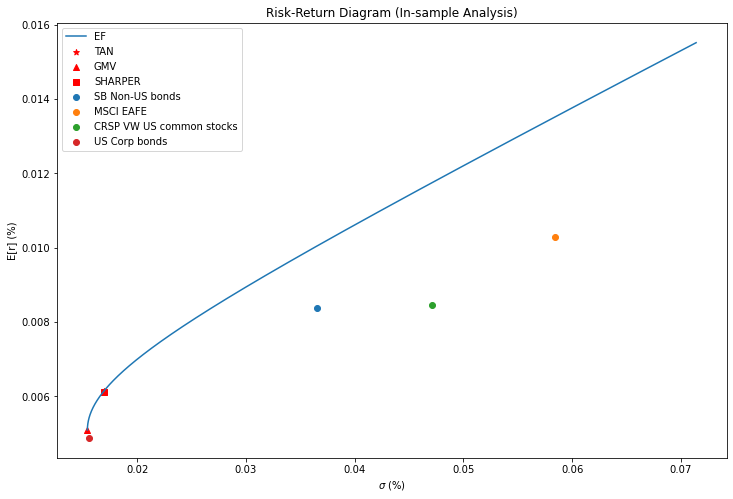

In [33]:
print('In-sample analysis')
plot_evaluation_results_in_sample (q3a_df)

## Qn 4

In [34]:
q4_data = {
    ' ': ['Stock 1', 'Stock 2', 'Market'],
    'Stock 1': [0.16, 0.02, 0.064],
    'Stock 2': [0.02, 0.09, 0.032],
    'Market': [0.064, 0.032, 0.04]
}
#creating df of probabilities
q4_df = pd.DataFrame(q4_data)
q4_df

,,Stock 1,Stock 2,Market
0,Stock 1,0.160,0.020,0.064
1,Stock 2,0.020,0.090,0.032
2,Market,0.064,0.032,0.040


An investor is considering forming a portfolio with the allocation: 
-  20% in the riskless asset
-  40% in Stock 1 
-  40% in Stock 2. 

Call this portfolio P. You have decided to analyze whether this portfolio is a sensible one using the CAPM model.

In [35]:
q4a_data = {
    ' ': ['Stock 1', 'Stock 2', 'Risk-Free'],
    'Stock 1': [0.16, 0.02, 0],
    'Stock 2': [0.02, 0.09, 0],
    'Risk-Free': [0, 0, 0]
}
#creating df of probabilities
q4a_df = pd.DataFrame(q4a_data)
q4a_df

,,Stock 1,Stock 2,Risk-Free
0,Stock 1,0.16,0.02,0
1,Stock 2,0.02,0.09,0
2,Risk-Free,0.00,0.00,0


### Portfolio Variance

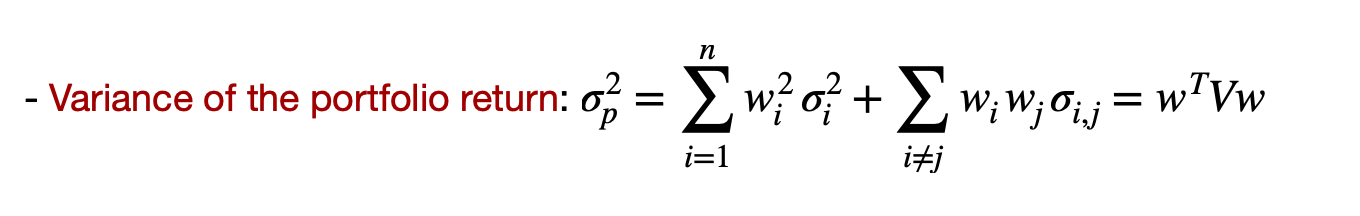

In [36]:
weights = np.array([0.4,0.4,0.2]) # Stock 1, Stock 2, Risk-free
port_var = weights.T @ np.array(q4a_df.iloc[:, 1:]) @ weights
print("Variance of this portfolio is: ", port_var)

Variance of this portfolio is:  0.046400000000000004


### 4b

What are the betas of assets 1, 2, and P relative to the market (i.e. what are β1, β2, and βP )? 

Suppose the riskless return rf is 4% and the expected return on the market E[rm] is 10%. 

Assuming that the CAPM is correct,


#### i. What is the expected return on portfolio P?

In [37]:
variance_market = 0.04 # Cov(x,x) = Var(x)

Beta1 = 0.064 / variance_market
Beta2 = 0.032 / variance_market
BetaP = 0.4 * Beta1 + 0.4 * Beta2 + 0.2 * 0 # Risk free asset has beta = 0

rf = 0.04
rm = 0.10
er_portfolio = 0.04 + BetaP * (rm - rf)

print("Expected Return of Portfolio: ", er_portfolio)

Expected Return of Portfolio:  0.09760000000000002


#### ii. Find an efficient portfolio consisting of the riskless asset and the market portfolio that
has the same standard deviation as portfolio P. 

What is the expected return on this portfolio?

Portfolio_Var = (weight_market^2 * std_market^2) + (weight_riskless^2 * std_riskless^2)  + (2 * weight_riskless * weight_riskless * cov_riskless_market)
-  since std_riskless is 0, the covariance of returns between riskless and market would be 0
-  thus the portfolio variance would be:

(weight_market^2 * std_market^2) = variance of portfolio returns

therefore, weight of market would be square root of the variance of portfolio divided by variance of market

In [38]:
#weight_market * variance_market + weight_riskless * variance_riskless = var_portfolio
#variance_riskless = 0
#therefore weight of market = var_portfolio / variance_market

weight_market = np.sqrt( port_var / variance_market)
weight_riskless = 1 - weight_market

q4b_er = weight_market * rm + weight_riskless * rf

print("Expected return from this portfolio: ", q4b_er)

Expected return from this portfolio:  0.10462197768561406


## Q5a-i

(10 pts) The file q5 data.csv contains historical monthly rates of return on several stock indices, corporate and government bonds, and individual stocks (taking dividend and interest payments into consideration) over certain period. All returns are measured in percentages. You may use the T-bill rate as the riskless rate and work with the excess returns (i.e., the additional returns compared to the riskless rate) throughout this question.


In [39]:
q5_df = pd.read_csv("q5_data.csv")
for col in q5_df.iloc[:,11:]:
    q5_df[col] = q5_df[col] - q5_df['T-bills']
q5_df['Market: World'] =  q5_df['Market: World'] - q5_df['T-bills']

for i in q5_df.columns[1:]:
    q5_df[i] = q5_df[i] /100
    
q5_df.head(5)

,Date,Market: World,Market: US,S&P 500,Long Term Bond,Corp Bnd,HML,SMB,Long - Short,T-bills,...,FORD,CHRYSLER,APPLE,IBM,COMPAQ,HP,BUSCH,HEINEKEN,KIRIN,MOLSON
0,1/31/85,0.0493,0.0924,0.0768,0.0364,0.0277,-0.0066,-0.0291,0.0299,0.0065,...,0.0727,0.0331,-0.0091,0.1009,0.2183,0.1006,0.0193,0.0547,0.0059,0.0873
1,2/28/85,-0.0033,0.0098,0.0137,-0.0493,-0.0315,-0.0022,-0.0135,-0.0551,0.0058,...,-0.0902,-0.0023,-0.1511,-0.0149,0.1942,-0.0192,0.0430,-0.0651,-0.0218,-0.1540
2,3/29/85,0.0290,-0.0019,0.0018,0.0307,0.0245,0.0058,0.0232,0.0245,0.0062,...,-0.0567,0.0467,-0.1105,-0.0588,-0.1729,-0.0856,0.0263,0.1022,0.1043,0.0301
3,4/30/85,-0.0094,-0.0038,-0.0032,0.0242,0.0309,0.0243,0.0142,0.0171,0.0072,...,-0.0287,-0.0106,-0.0456,-0.0108,0.1010,-0.0736,0.0301,-0.0320,0.0510,-0.0158
4,5/31/85,0.0453,0.0515,0.0615,0.0896,0.0890,-0.0092,0.0339,0.0829,0.0066,...,0.0572,0.0186,-0.1864,0.0188,-0.0338,0.0409,0.0831,-0.0209,0.1520,0.0885


In [40]:
q5_returns = q5_df.iloc[:,0].copy()
stocks_ls = q5_df.iloc[:,11:].columns.tolist()

q5_returns = pd.concat([q5_returns, q5_df[stocks_ls]], axis=1)
q5_returns['Portfolio_1'] = 0.5*q5_df['GM'] + 0.5*q5_df['IBM']
q5_returns['Portfolio_2'] = 1/3*q5_df['GM'] + 1/3*q5_df['IBM'] + 1/3*q5_df['BUSCH']
q5_returns['Portfolio_3'] = 1/4*q5_df['GM'] + 1/4*q5_df['IBM'] + 1/4*q5_df['BUSCH'] + 1/4*q5_df['TOYOTA']
q5_returns['Portfolio_4'] = sum([1/13*q5_df[col] for col in stocks_ls])

q5_returns.head(5)

,Date,TOYOTA,GM,BMW,FORD,CHRYSLER,APPLE,IBM,COMPAQ,HP,BUSCH,HEINEKEN,KIRIN,MOLSON,Portfolio_1,Portfolio_2,Portfolio_3,Portfolio_4
0,1/31/85,0.0711,0.0544,-0.0155,0.0727,0.0331,-0.0091,0.1009,0.2183,0.1006,0.0193,0.0547,0.0059,0.0873,0.07765,0.058200,0.061425,0.061054
1,2/28/85,-0.0529,-0.0345,-0.0275,-0.0902,-0.0023,-0.1511,-0.0149,0.1942,-0.0192,0.0430,-0.0651,-0.0218,-0.1540,-0.02470,-0.002133,-0.014825,-0.030485
2,3/29/85,-0.0056,-0.0878,0.0680,-0.0567,0.0467,-0.1105,-0.0588,-0.1729,-0.0856,0.0263,0.1022,0.1043,0.0301,-0.07330,-0.040100,-0.031475,-0.015408
3,4/30/85,0.0186,-0.0810,-0.0602,-0.0287,-0.0106,-0.0456,-0.0108,0.1010,-0.0736,0.0301,-0.0320,0.0510,-0.0158,-0.04590,-0.020567,-0.010775,-0.012123
4,5/31/85,-0.0669,0.0715,0.0815,0.0572,0.0186,-0.1864,0.0188,-0.0338,0.0409,0.0831,-0.0209,0.1520,0.0885,0.04515,0.057800,0.026625,0.023392


## Q5a-ii

In [41]:
portfolio_1 = {"r": q5_returns['Portfolio_1'].mean(),
              "var": q5_returns['Portfolio_1'].var()}
portfolio_2 = {"r": q5_returns['Portfolio_2'].mean(),
              "var": q5_returns['Portfolio_2'].var()}
portfolio_3 = {"r": q5_returns['Portfolio_3'].mean(),
              "var": q5_returns['Portfolio_3'].var()}
portfolio_4 = {"r": q5_returns['Portfolio_4'].mean(),
              "var": q5_returns['Portfolio_4'].var()}

for index, pf in enumerate([portfolio_1,portfolio_2,portfolio_3,portfolio_4]):
    print("Portfolio "+str(index+1)+": ")
    print("Average return :", pf["r"])
    print("Variance :", pf["var"])
    print("")

Portfolio 1: 
Average return : 0.00493076923076923
Variance : 0.004082346369727047

Portfolio 2: 
Average return : 0.007271581196581193
Variance : 0.0027451462911037595

Portfolio 3: 
Average return : 0.008572756410256411
Variance : 0.0020997874465467337

Portfolio 4: 
Average return : 0.012238362919132158
Variance : 0.0025107992112900776



### Linear Regression

In [42]:
# Linear Regression
from sklearn.linear_model import LinearRegression

# Put the X and Y variable in data frame for regression
q5_returns['Market: World'] = q5_df['Market: World'].copy()
q5_lr_betas = []

for index,pf in enumerate(['Portfolio_1', 'Portfolio_2', 'Portfolio_3', 'Portfolio_4']):
    y = q5_returns[pf]
    x = q5_returns[['Market: World']]

    lr = LinearRegression().fit(x, y)

    q5_lr_betas.append(lr.coef_)
    print("Portfolio "+str(index+1)+" beta:", q5_lr_betas[index])

Portfolio 1 beta: [0.76056551]
Portfolio 2 beta: [0.71962715]
Portfolio 3 beta: [0.77826308]
Portfolio 4 beta: [0.93120775]


In [43]:
q5_cov_matrix = estimate_V(q5_returns[['Portfolio_1', 'Portfolio_2', 'Portfolio_3', 'Portfolio_4', 'Market: World']])
q5_cov_matrix

array([[0.00405618, 0.00309333, 0.0025009 , 0.00227335, 0.00128902],
       [0.00309333, 0.00272755, 0.00213472, 0.00204821, 0.00121964],
       [0.0025009 , 0.00213472, 0.00208633, 0.00189071, 0.00131902],
       [0.00227335, 0.00204821, 0.00189071, 0.0024947 , 0.00157823],
       [0.00128902, 0.00121964, 0.00131902, 0.00157823, 0.00169482]])

In [44]:
# Covariance Direct
market_var = q5_cov_matrix[4,4]
q5_cov_betas = []
for i in range (0,4):
    q5_cov_betas.append(q5_cov_matrix[i,4]/market_var)
    
    print("Portfolio " + str(i+1) + " beta:", q5_cov_betas[i])


Portfolio 1 beta: 0.7605655117093628
Portfolio 2 beta: 0.7196271494502176
Portfolio 3 beta: 0.7782630788364359
Portfolio 4 beta: 0.9312077484900599


Therefore we can conclude that they are the same, whether we use the covariance definition of beta directly, or using Linear Regression

## Q5a-iii

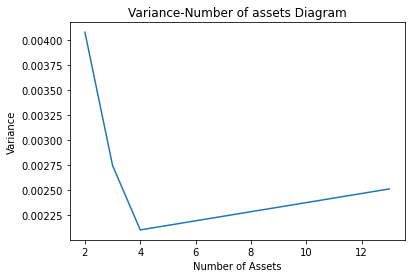

In [45]:
num_assets = np.array([2, 3, 4, 13])
variances = np.array([q5_returns['Portfolio_1'].var(),
                     q5_returns['Portfolio_2'].var(),
                     q5_returns['Portfolio_3'].var(),
                     q5_returns['Portfolio_4'].var()])

plt.plot(num_assets, variances)
plt.title('Variance-Number of assets Diagram')
plt.xlabel('Number of Assets')
plt.ylabel('Variance')

plt.show()

In [46]:
# Analyzing why the variance increases
temp = pd.DataFrame() 
other_stocks = [item for item in stocks_ls if item not in ['GM','IBM','BUSCH','TOYOTA']]
temp['Portfolio_9stocks'] = sum([1/9*q5_df[col] for col in other_stocks])
temp['Portfolio_4stocks'] = q5_returns['Portfolio_3']

sd_portfolio_9 = temp['Portfolio_9stocks'].std()
r_portfolio_9 = temp['Portfolio_9stocks'].mean()
var_portfolio_9 = temp['Portfolio_9stocks'].var()

print(r_portfolio_9,sd_portfolio_9, var_portfolio_9)

# 0.0020997874465467337

# 0.0025107992112900776

0.013867521367521375 0.056657823479474054 0.0032101089614312416


In [47]:
temp_cov_matrix = estimate_V(temp[['Portfolio_9stocks', 'Portfolio_4stocks']])
temp_cov_matrix

array([[0.00318953, 0.00180377],
       [0.00180377, 0.00208633]])

Text(0, 0.5, 'E[r] (%)')

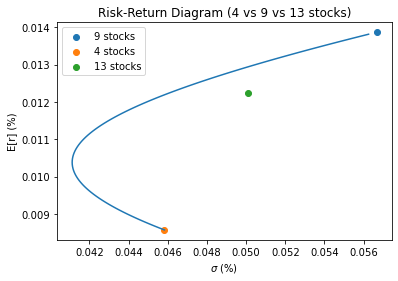

In [48]:
temp_weight_range = np.arange(0,1,0.01)
temp_sigma_range = np.zeros_like (temp_weight_range) * np.nan
temp_Er_range = np.zeros_like (temp_weight_range) * np.nan

for i in range(len(temp_weight_range)): # i is the index in the loop
    w9 = temp_weight_range[i]
    temp_sigma_range[i] = np.sqrt(w9**2*var_portfolio_9 + (1-w9)**2*portfolio_3["var"] + w9*(1-w9)*temp_cov_matrix[0,1])
    temp_Er_range[i] = w9*r_portfolio_9 + (1-w9)*portfolio_3["r"]

plt.plot(temp_sigma_range, temp_Er_range)
plt.scatter(sd_portfolio_9,r_portfolio_9, label="9 stocks")
plt.scatter(portfolio_3["var"]**0.5,portfolio_3["r"], label="4 stocks")
plt.scatter(portfolio_4["var"]**0.5,portfolio_4["r"], label="13 stocks")

plt.legend()
plt.title('Risk-Return Diagram (4 vs 9 vs 13 stocks)')
plt.xlabel('$\sigma$ (%)')
plt.ylabel('E[r] (%)')

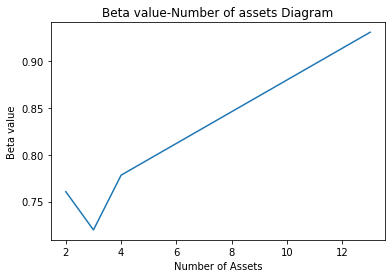

In [49]:
num_assets = np.array([2, 3, 4, 13])

plt.plot(num_assets, q5_lr_betas)
plt.title('Beta value-Number of assets Diagram')
plt.xlabel('Number of Assets')
plt.ylabel('Beta value')

plt.show()

Variance:
In general, we see that adding more stocks reduces the variance of the portfolio. However, when we add all 13 stocks, the variance of the portfolio increases slightly. Using a risk return diagram to understand why, we see that the variance of the other 9 stocks are significantly higher, hence adding them to the porfolio increases the overall portfolio variance. The increase in variance is compensated with higher returns.

Beta:
The beta of the portfolio is a weighted sum of each stock's beta. Hence, the beta of the portfolio changes when adding more stocks will either increase or decrease depending on the beta of the stocks added.

## Q5b

In [50]:
q5_full_cov_matrix = estimate_V(q5_returns[stocks_ls+ ['Market: World']])
q5_full_cov_matrix

array([[ 6.69586809e-03,  6.65714540e-04,  2.46788866e-03,
         6.52200532e-04,  3.74078682e-05,  7.52303833e-04,
         7.81512240e-04,  1.82167295e-03,  7.81287244e-04,
        -3.78514059e-04,  8.62245883e-04,  2.79875027e-03,
         4.98554164e-04,  1.61714703e-03],
       [ 6.65714540e-04,  5.64088934e-03,  1.82371973e-03,
         3.96974677e-03,  4.29593418e-03,  2.18497024e-03,
         2.40258158e-03,  1.88830363e-03,  2.78651699e-03,
         1.08604173e-03,  8.14402434e-04,  1.36520998e-03,
         1.83465958e-03,  1.43654023e-03],
       [ 2.46788866e-03,  1.82371973e-03,  6.92108677e-03,
         1.58597576e-03,  1.80978051e-03,  2.30617755e-03,
         1.47386976e-03,  1.50451726e-03,  2.12486147e-03,
         9.48684311e-04,  2.52798140e-03,  1.29749238e-03,
         6.93418537e-04,  1.74875061e-03],
       [ 6.52200532e-04,  3.96974677e-03,  1.58597576e-03,
         5.95117329e-03,  4.73171314e-03,  3.44187435e-03,
         1.96190529e-03,  2.13879235e-03,  3.

In [51]:
q5_cov_stock_betas = {}
for index,pf in enumerate(q5_returns[stocks_ls+ ['Market: World']].columns.tolist()):
    q5_cov_stock_betas[pf] = q5_full_cov_matrix[index,13]/market_var
    print(str(pf) + " beta:", q5_cov_stock_betas[pf])
    
print("-------------------------------")

pf1_beta = 0.5*q5_cov_stock_betas['GM'] + 0.5*q5_cov_stock_betas['IBM']
print("Portfolio 1: ", pf1_beta)

pf2_beta = 1/3*q5_cov_stock_betas['GM'] + 1/3*q5_cov_stock_betas['IBM'] + 1/3*q5_cov_stock_betas['BUSCH']
print("Portfolio 2: ", pf2_beta)

pf3_beta = 1/4*q5_cov_stock_betas['GM'] + 1/4*q5_cov_stock_betas['IBM'] + 1/4*q5_cov_stock_betas['BUSCH'] + 1/4*q5_cov_stock_betas['TOYOTA']
print("Portfolio 3: ", pf3_beta)

pf4_beta = [sum([1/13*q5_cov_stock_betas[col] for col in stocks_ls])][0]
print("Portfolio 4: ", pf4_beta)

TOYOTA beta: 0.9541708669950915
GM beta: 0.8476068099640742
BMW beta: 1.031821387662059
FORD beta: 0.9293587782224129
CHRYSLER beta: 1.1132679820821936
APPLE beta: 0.8638697662129113
IBM beta: 0.673524213454652
COMPAQ beta: 1.0702236838767993
HP beta: 1.0485210154701072
BUSCH beta: 0.6377504249319274
HEINEKEN beta: 0.7676464214981901
KIRIN beta: 1.460044727625672
MOLSON beta: 0.707894652374692
Market: World beta: 1.0
-------------------------------
Portfolio 1:  0.760565511709363
Portfolio 2:  0.7196271494502179
Portfolio 3:  0.7782630788364362
Portfolio 4:  0.9312077484900603


### Comparison

In [52]:
sample_returns = {}
capm_returns = {}

avg_market_r = q5_returns['Market: World'].mean()

for key in q5_cov_stock_betas:
    capm_returns[key] = q5_cov_stock_betas[key]*avg_market_r
    sample_returns[key] = q5_returns[key].mean()

capm_v_sample = pd.DataFrame([sample_returns, capm_returns]).T.rename(columns={0:'CAPM',1:'Sample'})
capm_v_sample['Difference'] = capm_v_sample['CAPM'] - capm_v_sample['Sample']
capm_v_sample

,CAPM,Sample,Difference
TOYOTA,0.012476,0.008213,0.004264
GM,0.005559,0.007295,-0.001736
BMW,0.014395,0.008881,0.005514
FORD,0.014260,0.007999,0.006261
CHRYSLER,0.014013,0.009582,0.004431
APPLE,0.004148,0.007435,-0.003287
IBM,0.004303,0.005797,-0.001494
COMPAQ,0.035803,0.009211,0.026591
HP,0.013500,0.009025,0.004475
BUSCH,0.011953,0.005489,0.006464


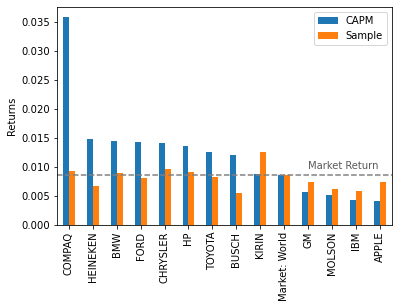

In [53]:
capm_v_sample.sort_values(by='CAPM', ascending=False).iloc[:, :2].plot(kind='bar')
plt.axhline(avg_market_r, c='gray', ls='--')
plt.text(10, avg_market_r+0.001, 'Market Return', c='#5A5A5A')
plt.xticks(rotation = 90)
plt.ylabel('Returns')
plt.legend()
plt.show();